# Lab 1 - FrozenLake MDP: Part 2 
# Assignment

- In this assignment you will learn how to tackle problems with limited state spaces.
- In particular we consider the FrozenLake MDP problem.

# Outline

- Part 0 introduced us to [gym](https://gym.openai.com/), an environment that allows us to test our reinforcement learning algorithms in various problems
- In Part 1, you implemented a policy iteration algorithm (in previous homework HW1)
- In Part 2, you will implement Q-Learning and SARSA (This homework HW2) 

# Deliverable

Regarding the Lab:

- Make sure your code runs from top to bottom without any errors.
- Your submitted Notebook must contain saved outputs.

# Recall: FrozenLake-v0 environment in Gym
- We look at [FrozenLake-v0 environment](https://gym.openai.com/envs/FrozenLake-v0/) in gym. 
- You don't need to write any code for this part
- you should still understand the code to help you solve Part 2


In [138]:
import os
# You will need numpy and gym. You can try running the following lines to install them
# The assignment is tested on Python3.8 so in case you are having installation issues you might 
# want to try installing that version. 

# !{os.sys.executable} -m pip install numpy
# !{os.sys.executable} -m pip install gym==0.17.3
import gym
import numpy as np

In [2]:
# Import the environment we will use in this assignment
env=gym.make('FrozenLake-v0') 

# Note: If you have installed the newest gym version, FrozenLake-v0 might not be available. In this case, instead of env=gym.make('FrozenLake-v0') you can use:
# env=gym.make('FrozenLake-v1',is_slippery=True)

# Show the model
print(f"Number of States {env.nS}, Number of Actions {env.nA}")
print(f"Reward range {env.reward_range}")

Number of States 16, Number of Actions 4
Reward range (0, 1)


In [3]:
env.reset() # reset the environment 

0

In [4]:
# visualize the current state
env.render()


SFFF
FHFH
FFFH
HFFG


# Part 2 - Model-Free Control

Recall that in Part 1 you implemented Policy Iteration with Policy Evaluation and Policy Improvement. However this required knowledge of the model (i.e. `env.P`). In this section we study methods that do not require knowing the model.

# Q-Learning
* In this part you will implement Q-Learning with epsilon-greedy exploration to find the optimal policy.  
  * You can experiment with fixed and adaptive learning rate and epsilon
  * Report your best result and mention the differences you observed in answer to final questions


In [6]:
# Initialize Running Parameters. 
# You should try to maintain the *number of episodes* and *max length of episode* at these numbers for your final results
# However feel free to modify them for debugging purposes
num_episodes       = 5000
episode_max_length = 100

# initialize discount factor and learning rate
gamma     = 0.95
learnRate = 0.8
epsilon = 1.
min_epsilon = 0.001
epsilon_decay = 0.999

#create Q table
Q=np.zeros([env.nS,env.nA]) #matrix Q[s,a]
reward_of_episodes = [] # list containing total reward of each episode (these rewards don't need to be discounted)
epsilons = []

#execute in episodes
for episode in range(num_episodes):
    # reset the environment at the beginning of an episode
    state = env.reset()
    rewards = 0

    for t in range(episode_max_length):
        
        ########### SELECT ACTION a for your current state using Q-values ##################
        # for example, choosing greedily:
        prob = np.random.random()
        greedy_action = np.argmax(Q[state,:])
        epsilon = epsilon * epsilon_decay
        epsilon = max(epsilon, min_epsilon)
        
        if prob > epsilon:
            action = greedy_action
        else:
            action = np.random.choice([x for x in range(env.nA) if x != greedy_action])
        
        # new state, reward, done
        newstate, reward, finished, _ = env.step(action)        
        qmax = np.max(Q[newstate,:])
        old_q = Q[state, action]
        new_q = old_q + learnRate * (reward + gamma * qmax - old_q)
        Q[state, action] = new_q

        rewards += reward
        
        # stop if we have reached terminal state 
        if finished:
            break
        # update state
        state = newstate
    reward_of_episodes.append(rewards) 
    epsilons.append(epsilon)

- Construct `reward_of_episodes`, a list with the total rewards of each episode (these rewards do not need to be discounted)
- Plot the moving average of the list
- Ideally you want to achieve a reward greater than 0.7 (the problem is technically considered solved for 0.78)

In [7]:
# You don't need to change the code here.
# you can use this function to plot the moving average of a list
from numpy import convolve, ones
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'valid')
from pylab import plot

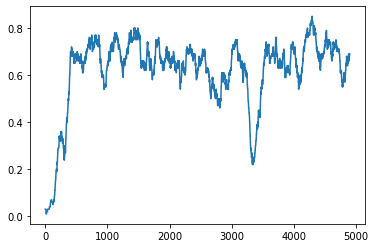

In [8]:
# Plot the moving average of total undiscounted reward across episodes here
rm=movingaverage(reward_of_episodes, 100)
plot(rm)

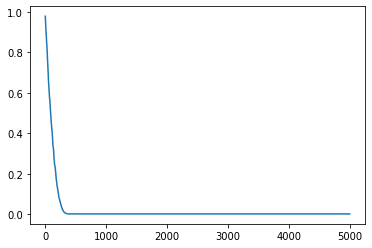

In [9]:
# Plot the moving average of total undiscounted reward across episodes here
rm=movingaverage(epsilons, 100)
plot(epsilons)

#  SARSA

- In the following you will implement SARSA with epsilon-greedy exploration.  
    - You can experiment with fixed and adaptive learning rate and epsilon
    - Report your best result and mention the differences you observed in answer to final questions

In [135]:
#initialize episodic structure - again try to maintain these two parameters as they are for your final submission
num_episodes=5000;
episode_max_length=100;

#initialize discount factor, learning rate
gamma=0.95
learnRate = 0.8
epsilon = 1.
min_epsilon = 0.005
epsilon_decay = 0.999


#create Q table
Q=np.zeros([env.nS,env.nA]) #matrix Q[s,a]
reward_of_episodes = [] # list containing total reward of each episode
epsilons = []

#execute in episodes
for episode in range(num_episodes):
    
    state = env.reset()
    rewards = 0

    for t in range(episode_max_length):
        
        ########### SELECT ACTION a for your current state using Q-values ##################
        # for example, choosing greedily:
        epsilon = epsilon * epsilon_decay
        epsilon = max(epsilon, min_epsilon)
        
        prob = np.random.random()
        greedy_action = np.argmax(Q[state,:])
        
        if prob > epsilon:
            action = greedy_action
        else:
            action = np.random.choice([x for x in range(env.nA) if x != greedy_action])
        
        # new state, reward, done
        newstate, reward, finished, _ = env.step(action)
        
        newprob = np.random.random()
        new_greedy_action = np.argmax(Q[newstate,:])
        
        if newprob > epsilon:
            newaction = new_greedy_action
        else:
            newaction = np.random.choice([x for x in range(env.nA) if x != new_greedy_action])
            
#         newnewstate, newreward, newfinished, _ = env.step(newaction)
        
        old_q = Q[state, action]
        next_q = Q[newstate, newaction]
        new_q = old_q + learnRate * (reward + gamma * next_q - old_q)
        Q[state, action] = new_q

        rewards += reward
        
        # stop if we have reached terminal state 
        if finished:
            break
        # update state
        state = newstate
    reward_of_episodes.append(rewards) 
    epsilons.append(epsilon)

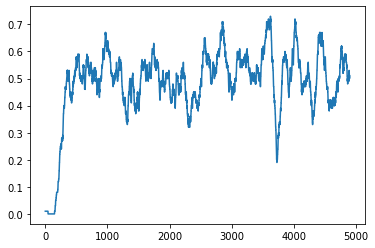

In [136]:
# Plot the moving average of total reward across episodes here
rm=movingaverage(reward_of_episodes, 100)
plot(rm)

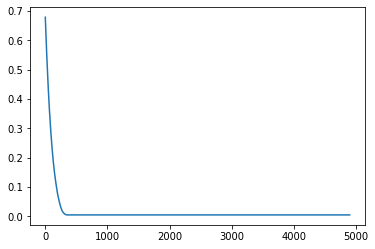

In [137]:
rm=movingaverage(epsilons, 100)
plot(rm)

#### How do your algorithms perform for different values of epsilon? Adaptive methods vs Fixed methods?
Adaptive methods works better for the epsilon, the reasoning is because at the start of the algorithm, the there is a huge variance in the Q values, and thus the maximum Q values selected to be the greedy action might not be an optimal action, and thus we should have higher value of epsilon. However, nearing the end of the episodes, when the Q value has converged, we should exploit and choose the greedy action as our policy more, and thus small value of epsilon will ensure us to do that

#### How do your algorithms perform for different values of the learning rate? Adaptive methods vs Fixed methods?
Adaptive methods works better for the learning rate. In the beginning, the initialization of the Q values might be off, and thus high learning rate helps the Q values to converge quickly to the true value. Nevertheless, near the end of the epochs, our Q values has converged, and thus we want to let it converge and does not want to introduce large stochasticity on the Q values.

#### With a fixed epsilon and under identical learning rate rules and gamma value, compare the performance of Q-learning and SARSA. 
Q learning in my experiment works better compared to SARSA. Nevertheless, it might be due to different hyperparameter optimization, as in theory both of the method converges to the true Q value and thus giving us optimal policy